# **C213 - Exemplo de um Sistema Fuzzy MISO**

In [188]:
%pip install -U scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


In [189]:
import numpy as np              # Suporte para arrays e operações matemáticas.
import skfuzzy as fuzzy         # Suporte para operação com Lógica Fuzzy.
import skfuzzy.control as ctrl  # Suporte para manipulação de Sistemas Fuzzy.
import matplotlib.pyplot as plt # Suporte para visualização de gráficos.

Utilize os blocos de código a seguir para a Fuzzyfização das Variáveis do Sistema Fuzzy.

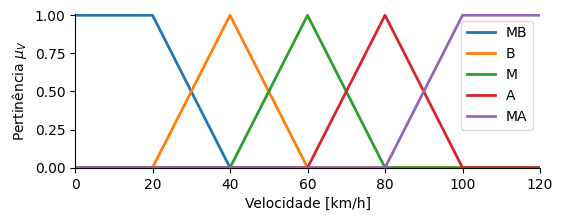

In [190]:
# Definição da variável Antecedente Velocidade 0:120 km/h
Velocidade = ctrl.Antecedent(universe=np.arange(0, 121, 1), label='Velocidade')

# Classificações de Velocidade em MB, B, M, A e MA.
Velocidade['MB'] = fuzzy.trapmf(Velocidade.universe, [0, 0, 20, 40])
Velocidade['B'] = fuzzy.trimf(Velocidade.universe, [20, 40, 60])
Velocidade['M'] = fuzzy.trimf(Velocidade.universe, [40, 60, 80])
Velocidade['A'] = fuzzy.trimf(Velocidade.universe, [60, 80, 100])
Velocidade['MA'] = fuzzy.trapmf(Velocidade.universe, [80, 100, 120, 120])

Velocidade.view()   # Método para visualização da Função de Pertinência.
[plt.gca().lines[i].set_linewidth(2) for i in range(len(plt.gca().lines))]

fig = plt.gcf()
axes = fig.gca()
fig.set_size_inches(6, 2)
axes.set_xlabel(xlabel='Velocidade [km/h]')
axes.set_ylabel(ylabel='Pertinência $\mu_{V}$')
plt.legend(loc='upper right')

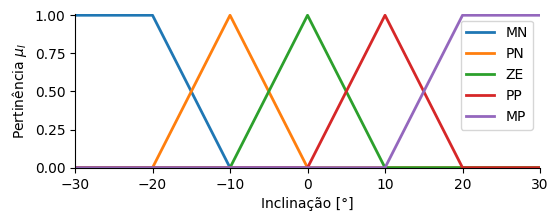

In [191]:
# Faça a Fuzzyficação da Variável Inclinação aqui.

# Definição da variável Antecedente Inclinação -30° a 30°
Inclinacao = ctrl.Antecedent(universe=np.arange(-30, 31, 1), label='Inclinação')

# Classificações de Inclinação em MN, PN, ZE, PP e MP
Inclinacao['MN'] = fuzzy.trapmf(Inclinacao.universe, [-30, -30, -20, -10])
Inclinacao['PN'] = fuzzy.trimf(Inclinacao.universe, [-20, -10, 0])
Inclinacao['ZE'] = fuzzy.trimf(Inclinacao.universe, [-10, 0, 10])
Inclinacao['PP'] = fuzzy.trimf(Inclinacao.universe, [0, 10, 20])
Inclinacao['MP'] = fuzzy.trapmf(Inclinacao.universe, [10, 20, 30, 30])

Inclinacao.view()   # Método para visualização da Função de Pertinência.
[plt.gca().lines[i].set_linewidth(2) for i in range(len(plt.gca().lines))]

fig = plt.gcf()
axes = fig.gca()
fig.set_size_inches(6, 2)
axes.set_xlabel(xlabel='Inclinação [°]')
axes.set_ylabel(ylabel='Pertinência $\mu_{I}$')
plt.legend(loc='upper right')

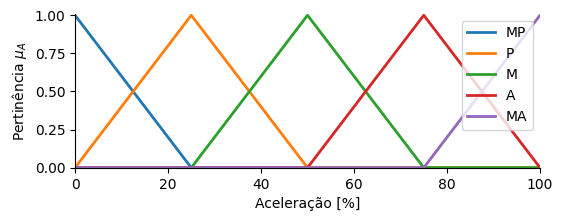

In [192]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Definição da variável Antecedente Aceleração 0% a 100%
Aceleracao = ctrl.Consequent(universe=np.arange(0, 101, 1), label='Aceleração')

# Classificações de Aceleração em MP, P, M, A e MA
Aceleracao['MP'] = fuzzy.trapmf(Aceleracao.universe, [0, 0, 0, 25])
Aceleracao['P'] = fuzzy.trimf(Aceleracao.universe, [0, 25, 50])
Aceleracao['M'] = fuzzy.trimf(Aceleracao.universe, [25, 50, 75])
Aceleracao['A'] = fuzzy.trimf(Aceleracao.universe, [50, 75, 100])
Aceleracao['MA'] = fuzzy.trapmf(Aceleracao.universe, [75, 100, 100, 100])

# Visualização da Função de Pertinência
Aceleracao.view()
[plt.gca().lines[i].set_linewidth(2) for i in range(len(plt.gca().lines))]

fig = plt.gcf()
axes = fig.gca()
fig.set_size_inches(6, 2)
axes.set_xlabel(xlabel='Aceleração [%]')
axes.set_ylabel(ylabel='Pertinência $\mu_{A}$')
plt.legend(loc='upper right')
plt.show()

Utilize os blocos de código a seguir para montagem da Base de Regras. Primeiramente defina as regras, depois junte todas em um array e forme a Base de Regras do Sistema Fuzzy.

In [193]:
# Regras para condição de Velocidade MB e variação da Inclinação:
R1 = ctrl.Rule(Velocidade['MB'] & Inclinacao['MN'], Aceleracao['P'])
R2 = ctrl.Rule(Velocidade['MB'] & Inclinacao['PN'], Aceleracao['M'])
R3 = ctrl.Rule(Velocidade['MB'] & Inclinacao['ZE'], Aceleracao['A'])
R4 = ctrl.Rule(Velocidade['MB'] & Inclinacao['PP'], Aceleracao['A'])
R5 = ctrl.Rule(Velocidade['MB'] & Inclinacao['MP'], Aceleracao['MA'])

# Complete a Base com as demais 20 regras.
# Utilize nomes padronizados para as variáveis.
R6 = ctrl.Rule(Velocidade['B'] & Inclinacao['MN'], Aceleracao['P'])
R7 = ctrl.Rule(Velocidade['B'] & Inclinacao['PN'], Aceleracao['P'])
R8 = ctrl.Rule(Velocidade['B'] & Inclinacao['ZE'], Aceleracao['M'])
R9 = ctrl.Rule(Velocidade['B'] & Inclinacao['PP'], Aceleracao['A'])
R10 = ctrl.Rule(Velocidade['B'] & Inclinacao['MP'], Aceleracao['MA'])

R11 = ctrl.Rule(Velocidade['M'] & Inclinacao['MN'], Aceleracao['MP'])
R12 = ctrl.Rule(Velocidade['M'] & Inclinacao['PN'], Aceleracao['P'])
R13 = ctrl.Rule(Velocidade['M'] & Inclinacao['ZE'], Aceleracao['M'])
R14 = ctrl.Rule(Velocidade['M'] & Inclinacao['PP'], Aceleracao['M'])
R15 = ctrl.Rule(Velocidade['M'] & Inclinacao['MP'], Aceleracao['A'])

R16 = ctrl.Rule(Velocidade['A'] & Inclinacao['MN'], Aceleracao['MP'])
R17 = ctrl.Rule(Velocidade['A'] & Inclinacao['PN'], Aceleracao['MP'])
R18 = ctrl.Rule(Velocidade['A'] & Inclinacao['ZE'], Aceleracao['P'])
R19 = ctrl.Rule(Velocidade['A'] & Inclinacao['PP'], Aceleracao['M'])
R20 = ctrl.Rule(Velocidade['A'] & Inclinacao['MP'], Aceleracao['M'])

R21 = ctrl.Rule(Velocidade['MA'] & Inclinacao['MN'], Aceleracao['MP'])
R22 = ctrl.Rule(Velocidade['MA'] & Inclinacao['PN'], Aceleracao['MP'])
R23 = ctrl.Rule(Velocidade['MA'] & Inclinacao['ZE'], Aceleracao['MP'])
R24 = ctrl.Rule(Velocidade['MA'] & Inclinacao['PP'], Aceleracao['P'])
R25 = ctrl.Rule(Velocidade['MA'] & Inclinacao['MP'], Aceleracao['M'])


In [194]:
# Monte a Base de Regras aqui.
# Utilize nomes padronizados para as variáveis.
Base_Regras = [R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14, R15, R16, R17, R18, R19, R20, R21, R22, R23, R24, R25]


In [195]:
# Print uma regra qualquer e observe como ela é interpretada.
print(R1)

IF Velocidade[MB] AND Inclinação[MN] THEN Aceleração[P]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [196]:
vermelho, verde, amarelo, azul, magenta, ciano = ['\033[91m', '\033[92m', '\033[93m', '\033[94m', '\033[95m', '\033[96m']

In [197]:
import re                       # Suporte para reconhecimento de expressões regulares.
import pandas as pd             # Suporte para manipulação de DataFrames.
from tabulate import tabulate   # Suporte para manipulação de Tabelas.

tabela = []
for velocidade in Velocidade.terms:
  for inclinacao in Inclinacao.terms:
    for regra in Base_Regras:
      antecedente = str(regra).split('IF ')[1].split(' THEN')[0].replace('AND ', '')
      consequente = str(regra).split('IF ')[1].split(' THEN')[1].split('AND ')[0]

      classificacoes = re.findall(r'\[(.*?)\]', (antecedente + consequente))
      if velocidade == classificacoes[0] and inclinacao == classificacoes[1]:
        tabela.append([classificacoes[0], classificacoes[1], classificacoes[2]])
        break

df = pd.DataFrame(tabela, columns=[Velocidade.label, 'E', Aceleracao.label])
pivotTable = pd.DataFrame(df.pivot(index='E', columns=Velocidade.label, values=Aceleracao.label).reindex(index=Inclinacao.terms, columns=Velocidade.terms))
pivotTable.index.name = f'{magenta}{pivotTable.index.name}\033[0m'
print(tabulate(pivotTable, headers='keys', tablefmt='fancy_grid', stralign='center', showindex='always'))


╒═════╤══════╤═════╤═════╤═════╤══════╕
│  E  │  MB  │  B  │  M  │  A  │  MA  │
╞═════╪══════╪═════╪═════╪═════╪══════╡
│ MN  │  P   │  P  │ MP  │ MP  │  MP  │
├─────┼──────┼─────┼─────┼─────┼──────┤
│ PN  │  M   │  P  │  P  │ MP  │  MP  │
├─────┼──────┼─────┼─────┼─────┼──────┤
│ ZE  │  A   │  M  │  M  │  P  │  MP  │
├─────┼──────┼─────┼─────┼─────┼──────┤
│ PP  │  A   │  A  │  M  │  M  │  P   │
├─────┼──────┼─────┼─────┼─────┼──────┤
│ MP  │  MA  │ MA  │  A  │  M  │  M   │
╘═════╧══════╧═════╧═════╧═════╧══════╛


Utilize o bloco de código a seguir para definir o modelo do Sistema Fuzzy a partir da Base de Regras anterior e faça um input das Variáveis de Entrada.

In [198]:
ControleVelocidade = ctrl.ControlSystemSimulation(ctrl.ControlSystem(Base_Regras))
ControleVelocidade.input[Velocidade.label] = 32  # Escolha um input para a Velocidade.
ControleVelocidade.input[Inclinacao.label] = 3  # Escolha um input para a Inclinação.

In [199]:
# Resgate os valores das Variáveis de Entrada aqui.

ControleVelocidade._get_inputs()

OrderedDict([('Velocidade', 32), ('Inclinação', 3)])

Utilize os blocos de código a seguir para observar as classificações do valor de saída e computar o valor equivalente.

In [200]:
ativacaoVelocidade = []   # Regiões ativadas para a Velocidade.

# Graus de pertinência para a variável Velocidade:
for velocidade in Velocidade.terms:
  uV = fuzzy.interp_membership(Velocidade.universe, Velocidade[velocidade].mf, ControleVelocidade._get_inputs()[Velocidade.label])
  if uV != 0:
    print(f'Pertinência {velocidade}: {uV:.2f}')
    ativacaoVelocidade.append(velocidade)


Pertinência MB: 0.40
Pertinência B: 0.60


In [201]:
# Compute os valores da Variável Inclinação aqui.
ativacaoInclinacao = []   # Regiões ativadas para a Inclinação.

# Graus de pertinência para a variável Inclinação:
for inclinacao in Inclinacao.terms:
  uI = fuzzy.interp_membership(Inclinacao.universe, Inclinacao[inclinacao].mf, ControleVelocidade._get_inputs()[Inclinacao.label])
  if uI != 0:
    print(f'Pertinência {inclinacao}: {uI:.2f}')
    ativacaoInclinacao.append(inclinacao)

Pertinência ZE: 0.70
Pertinência PP: 0.30


In [202]:
ControleVelocidade.compute()


In [203]:
# Verifique as classificações da Variável de Saída aqui.

# Graus de pertinência para a variável Aceleração:
for aceleracao in Aceleracao.terms:
  uA = fuzzy.interp_membership(Aceleracao.universe, Aceleracao[aceleracao].mf, ControleVelocidade.output[Aceleracao.label])
  if uA != 0:
    print(f'Pertinência {aceleracao}: {uA:.2f}')


Pertinência M: 0.58
Pertinência A: 0.42


d:\Downloads\GitHub\C213-lab-codes\C213venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


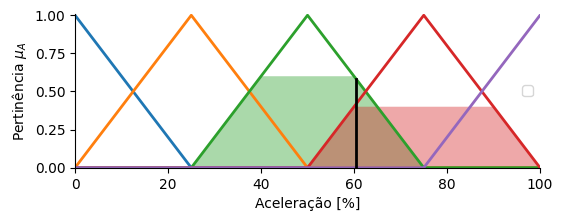

In [204]:
Aceleracao.view(sim=ControleVelocidade)
[plt.gca().lines[i].set_linewidth(2) for i in range(len(plt.gca().lines))]

fig = plt.gcf()
axes = fig.gca()
fig.set_size_inches(6, 2)
axes.set_xlabel(xlabel='Aceleração [%]')
axes.set_ylabel(ylabel='Pertinência $\mu_{A}$')
plt.legend('')

In [205]:
print(f'Valor da Aceleração: {ControleVelocidade.output[Aceleracao.label]/100:.2%}.')

Valor da Aceleração: 60.48%.
